

---


Nombre de los integrantes


*   Cruz Pérez Joshua Santiago
*   Hernández Banda Oziel
*   Jimenez Borzani Naomi Daniela
*   Paredes Hernández Ximena


---


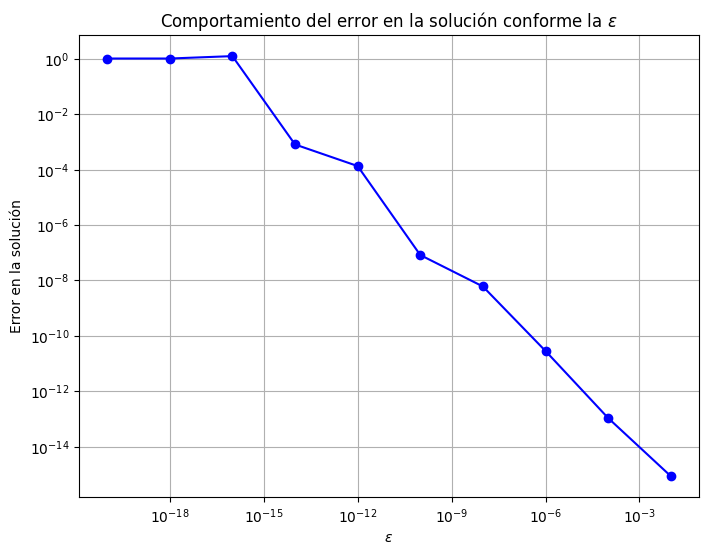

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def eliminacion_gaussiana(A, b):
    n = len(A)
    for i in range(n):
        for j in range(i + 1, n):
            if A[j, i] != 0:
                factor = A[j, i] / A[i, i]
                A[j, :] -= factor * A[i, :]
                b[j] -= factor * b[i]

    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        x[i] = b[i] / A[i, i]
        for j in range(i-1, -1, -1):
            b[j] -= A[j, i] * x[i]

    return x

# Definimos la epsilon y la solución que nos dieron
epsilons = [10**(-2*k) for k in range(1, 11)]
solucion_exacta = np.array([1, 1])
# Aquí guardamos cuanto nos equivocamos de la solución
errores = []

for epsilon in epsilons:
    # Definimos A y el vector b
    A = np.array([[epsilon, 1], [1, 1]])
    b = np.array([1 + epsilon, 2])

    # Aplicamos la eliminación gaussiana
    solucion = eliminacion_gaussiana(A.copy(), b.copy())

    # Calcular el error
    error = np.linalg.norm(solucion - solucion_exacta)
    errores.append(error)

# Veamos como se comportan los errores
plt.figure(figsize=(8, 6))
plt.plot(epsilons, errores, marker='o', linestyle='-', color='b')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\epsilon$')
plt.ylabel('Error en la solución')
plt.title('Comportamiento del error en la solución conforme la $\epsilon$')
plt.grid(True)
plt.show()